In [1]:
import os
#import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame 
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
# import netCDF4
%matplotlib inline

In [2]:
if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')
    
DATA_DIR = os.path.join(env+'/data/euclia/ts_bc_cordex/')
os.uname()[1]

'obelix2'

In [3]:
obs = pd.read_csv(os.path.join(env+'/data/euclia/pr_obs.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 header=[0,1,2],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0]
                 )
obs_12 = obs['1912':'2014']
# pr.to_csv(env+'/data/euclia/pr.csv')

In [4]:
pr = pd.read_csv(os.path.join(env+'/data/euclia/pr.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 header=[0,1,2,3,4,5,6,],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0]
                 )

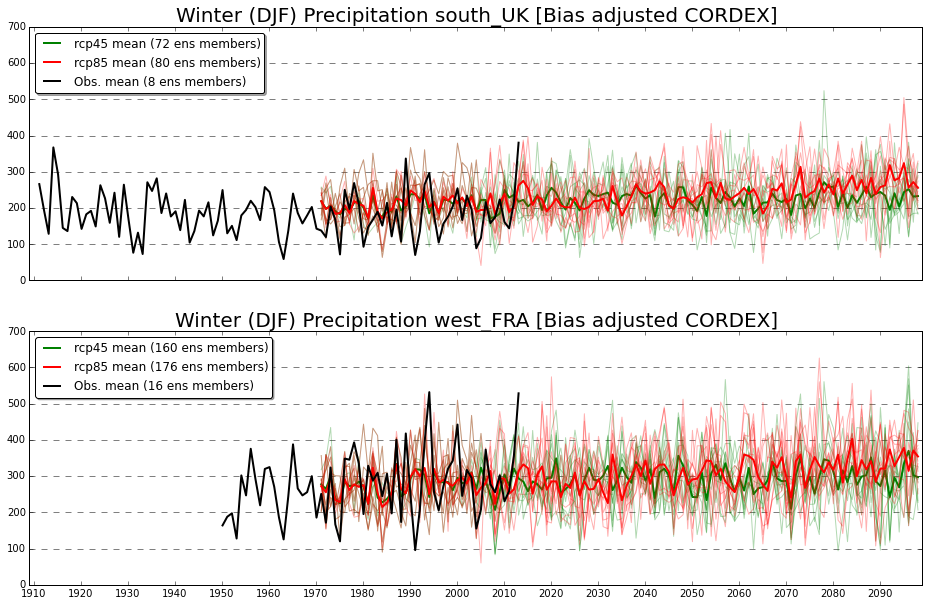

In [5]:
f, axarr = plt.subplots(2, sharex=True, figsize=(16, 10))
start = dt.datetime.strptime('1910','%Y') # dt.datetime.strptime('195412','%Y%m') #19541201
end = dt.datetime.strptime('2100','%Y') # dt.datetime.strptime('210012','%Y%m')
year_ticks = pd.date_range(start, end, freq='10A', )
regions = ['south_UK', 'west_FRA']
c=0
con = []
miss = 0 
for region in regions: # 
        for rcp in pr.columns.levels[1]:
            if rcp == 'rcp45':
                color = 'green'
            if rcp == 'rcp85':
                color = 'red'    
               
            em = np.shape(pr.xs([region, rcp], level=['region','rcp'], axis=1))[1]
            axarr[c].plot(pr.index, pr.xs([region, rcp], level=['region','rcp'], axis=1).mean(axis=1), 
                          label= '%s mean (%i ens members)' % (rcp, em) , color=color, linewidth=2)

            for gcm in pr.columns.levels[4]:
                for rcm in pr.columns.levels[5]:
                    y = pr.xs([region, rcp, gcm, rcm], 
                                                  level=['region','rcp','gcm', 'rcm' ],
                                                  axis=1).mean(axis=1)
                    
                    axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                    if not np.all(np.isnan(y)):
                        con.extend(y)
                        miss= miss+1                        

        em_obs = np.shape(obs_12.xs([region], level=['region'], axis=1))[1]
        axarr[c].plot(obs_12.index, obs_12.xs([region], level=['region'], axis=1).mean(axis=1), c='black', 
                      label= 'Obs. mean (%i ens members)' % (em_obs) ,linewidth=2)

        axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True) # bbox_to_anchor=(1.1 , 1.00)
        axarr[c].set_title('Winter (DJF) Precipitation %s [Bias adjusted CORDEX]' % (region), fontsize=20)
        axarr[c].hlines(range(0,700,100), start , end , linestyle='--', alpha=0.5)
        axarr[c].set_ylim(0,700)
        
        axarr[c].set_xticks(year_ticks)
        axarr[c].set_xlim(start,end)
        
        c=+1
        #axarr.set_title
        

In [6]:
add_path = os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/'
add_path

'/home/users/nhempel/birdhouse/flyingpigeon/flyingpigeon/'

In [7]:
# Returntimes 
import sys
sys.path.append(os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/')

import extremevents as ev

In [42]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr


reload(ev)

<module 'extremevents' from '/home/users/nhempel/birdhouse/flyingpigeon/flyingpigeon/extremevents.pyc'>

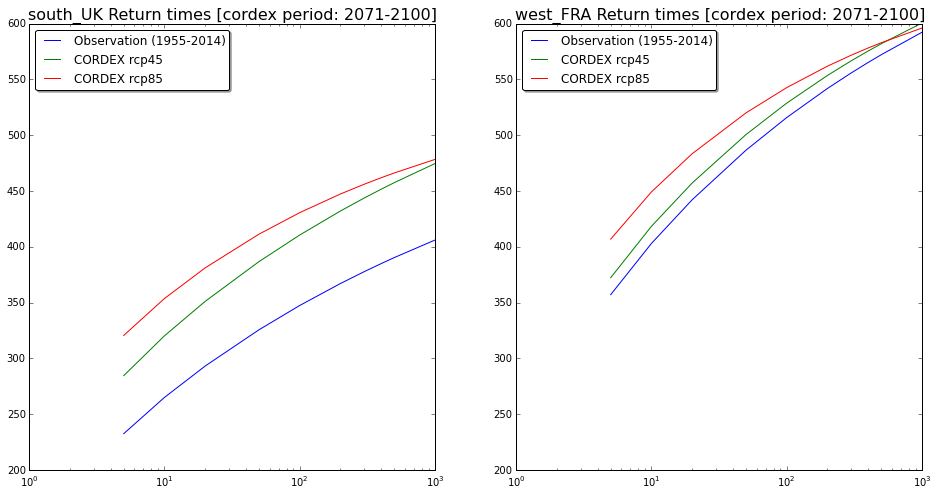

In [9]:

f, axarr = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
c=0
period = '2071-2100'
# x = [ 5 ,10 ,20, 50 ,100 ,200, 300, 400 ,500 ,1000 ]
for region  in regions:
        
    obs = list(obs_12['1955':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )#
    rl = ev.returnlevels(obs)
    x = rl[0]
    axarr[c].plot(x,rl[1] ,  label= 'Observation (1955-2014)') 
    #axarr[c].fill_between(x,rl[1],rl[3], color = 'grey', alpha=0.5 )
    
    for rcp in pr.columns.levels[1]:
        if rcp == 'rcp45':
            color = 'green'
        if rcp == 'rcp85':
            color = 'red'    
        con = []
        for gcm in pr.columns.levels[4]:
            for rcm in pr.columns.levels[5]:
                y = pr['2071':'2100'].xs([region, rcp, gcm, rcm], level=['region','rcp','gcm', 'rcm' ], axis=1).mean(axis=1)
                # axarr[c].plot(pr.index, y , color=color, alpha = 0.3 )
                if not np.all(np.isnan(y)):
                    con.extend(y)
                    miss= miss+1     

        rl = ev.returnlevels(con)

        x = rl[0]
        axarr[c].plot(x,rl[1], label= 'CORDEX %s' % (rcp)) 

    axarr[c].set_title('%s Return times [cordex period: %s]' % (region, period), fontsize=16)
    axarr[c].set_ylim(200,600)
    #axarr[c].set_xlim(-100,1000)
    axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True)
    axarr[c].set_xscale("log")

    c=+1  

In [47]:
#def returnlevel(ts):
  #from numpy import vstack


In [40]:
con = np.array(con)
RR=evd.fgev(con)

NameError: name 'evd' is not defined

In [ ]:
#type(RR)
print(RR.names)

In [57]:
#cons = [con[i] for i in IIs]
#cons
print RR.names

 [1] "estimate"    "std.err"     "fixed"       "param"       "deviance"   
 [6] "corr"        "var.cov"     "convergence" "counts"      "message"    
[11] "data"        "tdata"       "nsloc"       "n"           "prob"       
[16] "loc"         "call"       



In [75]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

evd = importr('evd')

T=1000
nsim=1000
RL1000=[]
II=range(0,len(con),1)

for i in range(0,nsim,1):
    IIs = sorted(np.random.choice(II, int(len(II)/5)))
    cons = np.array([con[i] for i in IIs]) 
    cons_fgev = (evd.fgev(cons))
    a=cons_fgev.rx2('estimate')[0]
    b=cons_fgev.rx2('estimate')[1]
    s=cons_fgev.rx2('estimate')[2]
    RL1000.append([T,a,b,s])
 

In [76]:
quants1000 = np.percentile(RL1000, [10, 90])

{'boxes': [<matplotlib.lines.Line2D at 0x2b75a612b310>],
 'caps': [<matplotlib.lines.Line2D at 0x2b75a6156250>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b75a6139550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b75a6156ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b75a612b590>,
  <matplotlib.lines.Line2D at 0x2b75a612bbd0>]}

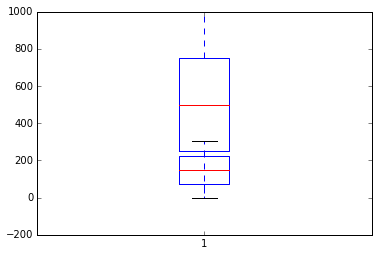

In [79]:
plt.boxplot(quants)
plt.boxplot(quants1000)

In [ ]:
for(i in 1:nsim){
  II.s=sort(unique(sample(II,replace=TRUE)))
  RR.s.fgev=fgev(RR[II.s])
  a=RR.s.fgev$estimate[1]
  b=RR.s.fgev$estimate[2]
  s=RR.s.fgev$estimate[3]
  RL.s=c(RL.s,RL(T,a,b,s))
}

RL.s.q=quantile(RL.s,probs=c(0.1,0.9))

boxplot(RL.s)
abline(h=c(RL0,RL.s.q),lwd=c(3,1,1),lty=c(1,2,2))

In [41]:
#II
#sorted(np.random(con))


In [ ]:
# plt.plot(np.array(RR.rx('data')))
def RL(T,a,b,s):
    from math import log 
    yT = -1/log(1 - 1/T)
    if(s != 0):
        zT= a + b*((yT**s) -1)/s
    else:
        zT= a + b * log(yT)
    return(zT)

a=RR.rx2('estimate')[0] # RR.fgev$estimate[1]
b=RR.rx2('estimate')[1] # RR.fgev$estimate[2]
s=RR.rx2('estimate')[2] # fgev$estimate[3]
rp = [ 5. ,10. ,20., 50. ,100. ,200., 300., 400. ,500. ,1000. ]
rl = []
rl_c = []
#rl_min = []
#rl_max = []
#T=1000.
for T in rp:
    rl.append(RL(T,a,b,s))
#    print rl  
        
rl_c = np.vstack((rp,rl))

In [67]:
setwd("/homel/yiou/ownCloud/documents/EUCLEIA")
RR=scan(file="UK_RR.dat")
II=c(1:length(RR))

## Computation of EVD parameters for RR
RR.fgev=fgev(RR)

plot(RR.fgev,4)

## Return Levels
"RL" = function(T,a,b,s)
  {
    yT= -1/log(1 - 1/T)
    if(s != 0){
      zT= a + b*((yT)^s -1)/s
    }
    else{
      zT= a + b * log(yT)
    }
    return(zT)
  }

T=100
a=RR.fgev$estimate[1]
b=RR.fgev$estimate[2]
s=RR.fgev$estimate[3]

RL0=RL(T,a,b,s)


## Bootstrap for the confidence intervals around RL0
## (return level for 100 years)
nsim=1000
RL.s=c()
for(i in 1:nsim){
  II.s=sort(unique(sample(II,replace=TRUE)))
  RR.s.fgev=fgev(RR[II.s])
  a=RR.s.fgev$estimate[1]
  b=RR.s.fgev$estimate[2]
  s=RR.s.fgev$estimate[3]
  RL.s=c(RL.s,RL(T,a,b,s))
}

RL.s.q=quantile(RL.s,probs=c(0.1,0.9))

boxplot(RL.s)
abline(h=c(RL0,RL.s.q),lwd=c(3,1,1),lty=c(1,2,2))
